# Regression

Dalam notebook ini, kita akan membahas salah satu "tugas" dalam machine learning yang termasuk dalam supervised learning, yaitu regresi. Kita akan coba belajar dengan pendekatan top-down dengan mencoba implementasinya dalam Python terlebih dahulu, lalu memahami intuisi regresi yang sudah diimplementasi tersebut.

## Machine Learning & Supervised Learning

Dari sekian banyak definisi machine learning, yang paling relevan (mungkin) adalah sebuah mesin/sistem yang belajar dari sebuah pengalaman $E$ untuk suatu tugas $T$ yang diukur oleh suatu ukuran kuantitatif $P$. Suatu mesin dikatakan belajar jika output yang dihasilkan untuk tugas $T$ tersebut, yang diukur oleh $P$, semakin baik dari pengalaman $E$.

> Definisi ini diturunkan dari definisi machine learning oleh [Tom Mitchell](https://www.cs.cmu.edu/~tom/mlbook.html)

Algoritma machine learning dapat dibedakan menjadi 2 jenis berdasarkan *experience* algoritma tersebut dalam memproses data selama proses pembelajaran (training), yaitu **supervised learning** dan **unsupervised learning**. Regresi merupakan salah satu task yang termasuk dalam supervised learning.

Regresi, dalam machine learning, merupakan suatu task yang mencoba memprediksi suatu nilai real dari suatu input.

<div style="text-align: right;font-size: 12px"><a href="https://www.deeplearningbook.org/contents/ml.html">Source<a/><div/>

## Simple Linear Regression

Pertama, kita akan membuat model linear regression untuk memprediksi harga rumah menggunakan data [berikut](https://drive.google.com/drive/folders/18rjxjQxcq-qEM3MHRi340lVtm4kw4jqw?usp=sharing) yang diambil dari [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [1]:
# import things
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df_houses_train = pd.read_csv("data/house-price/train.csv")
num_train, num_feat = df_houses_train.shape

df_houses_test = pd.read_csv("data/house-price/test.csv")
num_test, _ = df_houses_test.shape

print("Jumlah data train:", num_train)
print("Jumlah data test:", num_test)
print("Jumlah fitur:", num_feat)

Jumlah data train: 1460
Jumlah data test: 1459
Jumlah fitur: 81


In [3]:
df_houses_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Pertama, kita akan coba memprediksi harga rumah yang direpresentasikan pada kolom `SalePrice` hanya dengan menggunakan fitur `GrLivArea`. Jenis linear regression yang hanya menggunakan 1 (satu) fitur (**independent variable**) untuk memprediksi suatu nilai target (**dependent variable**) adalah regresi linear sederhana atau dikenal juga dengan **univariate/simple linear regression**.

Tapi, sebelum kita mendefinisikan model regresi linear menggunakan scikit-learn, kita coba plot relasi antara kedua variabel tersebut.

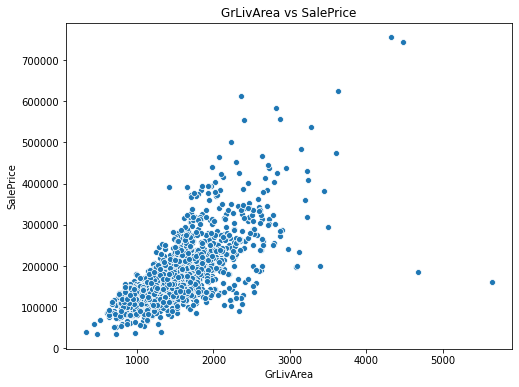

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df_houses_train)
plt.title("GrLivArea vs SalePrice")
plt.show()

Sebagai awalan, kita akan coba menggunakan 30% dari training set yang diambil secara acak.

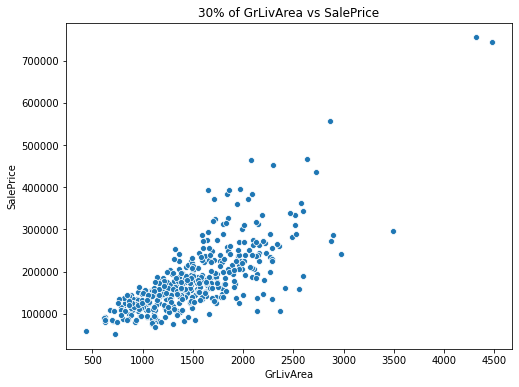

In [5]:
df_sample = df_houses_train[["GrLivArea", "SalePrice"]].sample(frac=.3, random_state=11)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df_sample)
plt.title("30% of GrLivArea vs SalePrice")
plt.show()

In [6]:
# X_train and y_train for our sample
sample_X_train = df_sample[["GrLivArea"]]
sample_y_train = df_sample[["SalePrice"]]

In [7]:
# X_dev and y_dev for our sample
sample_X_dev = df_houses_train.loc[~df_houses_train.index.isin(df_sample.index), ["GrLivArea"]]
sample_y_dev = df_houses_train.loc[~df_houses_train.index.isin(df_sample.index), ["SalePrice"]]

In [8]:
assert (sample_X_dev.shape[0] + sample_X_train.shape[0]) == df_houses_train.shape[0]
assert (sample_y_dev.shape[0] + sample_y_train.shape[0]) == df_houses_train.shape[0]

Setelah kita menyiapkan semuanya, kita mulai mendefinisikan model dan melatihnya.

In [9]:
linreg = LinearRegression()
linreg.fit(sample_X_train, sample_y_train)
sample_y_pred = linreg.predict(sample_X_train)
sample_y_pred_dev = linreg.predict(sample_X_dev)

## Metrics

Sesuai dengan definisi machine learning di awal, kita memerlukan suatu ukuran kuantitatif untuk menentukan "kinerja" dari suatu model, yang dikenal dengan **metrics**. Metrics bekerja dengan membandingkan hasil prediksi dari model dengan target sebenarnya. Umumnya, pemilihan metrics sangat bergantung oleh task yang sedang dikerjakan.

Beberapa metrics yang sering digunakan dalam untuk masalah regresi:
* MAE - Mean Absolute Error
* MSE - Mean Squared Error
* RMSE - Root Mean Squared Error
* $R^2$ (R-squared)

Scikit-learn sudah menyediakan beberapa metrics di atas dan lainnya yang sering digunakan.

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae_score = mean_absolute_error(sample_y_train, sample_y_pred)
mse_score = mean_squared_error(sample_y_train, sample_y_pred)
rsquared_score = r2_score(sample_y_train, sample_y_pred)
rmse_score = np.sqrt(mse_score)

print("MAE score:", mae_score)
print("MSE score:", mse_score)
print("RMSE score:", rmse_score)
print("R-squared score:", rsquared_score)

MAE score: 36506.301620757826
MSE score: 2802733534.3372865
RMSE score: 52940.849391913674
R-squared score: 0.5793963426143813


In [11]:
# TODO: define mae_score, mse_score, rmse_score, and rsquared_score for dev set
# ... HERE ...
mae_score_dev = mean_absolute_error(sample_y_dev, sample_y_pred_dev)
mse_score_dev = mean_squared_error(sample_y_dev, sample_y_pred_dev)
rsquared_score_dev = r2_score(sample_y_dev, sample_y_pred_dev)
rmse_score_dev = np.sqrt(mse_score_dev)

print("MAE score for dev set:", mae_score_dev)
print("MSE score for dev set:", mse_score_dev)
print("RMSE score for dev set:", rmse_score_dev)
print("R-squared score for dev set:", rsquared_score_dev)

MAE score for dev set: 39404.08850857901
MSE score for dev set: 3361612404.4783454
RMSE score for dev set: 57979.41362654805
R-squared score for dev set: 0.45358712457106587


### Mean Absolute Error

MAE atau Mean Absolute Error adalah metric dalam task regresi yang (mungkin) paling sederhana. Kita hanya menghitung **rata-rata dari selisih antara hasil prediksi dan target**. Untuk mencegah selisih bernilai negatif, maka diambil nilai mutlak (oleh karena itu, *absolute*) dari tiap selisihnya.

<img src="https://i.imgur.com/BmBC8VW.jpg" style="width: 50%"/>
<a href="https://www.dataquest.io/blog/understanding-regression-error-metrics/">Source</a>

Karena menggunakan nilai mutlak, salah satu karakteristik dari metric ini adalah kurang sensitif terhadap *underestimate* dan *overestimate* hasil prediksi.

<img src="https://i.imgur.com/tqnei6J.jpg" style="width: 50%"/>
<a href="https://www.dataquest.io/blog/understanding-regression-error-metrics/">Source</a>

### Mean Square Error

MSE atau Mean Squared Error adalah metric yang paling populer digunakan untuk masalah regresi. Perbedaaan MSE dengan MAE adalah MSE menguadratkan selisih antara hasil prediksi dan target.

<img src="https://i.imgur.com/vB3UAiH.jpg" style="width: 50%"/>
<a href="https://www.dataquest.io/blog/understanding-regression-error-metrics/">Source</a>

Karena sifat kuadrat, maka MSE pasti akan lebih besar daripada MAE. Oleh karena ini, tidak adil jika kita membandingkan MSE dan MAE secara langsung (kecuali untuk membandingkan beberapa model).

<img src="https://i.imgur.com/mLn8AeW.jpg" style="width: 50%"/>
<a href="https://www.dataquest.io/blog/understanding-regression-error-metrics/">Source</a>

Dari gambar di atas, MSE akan memberikan nilai error yang jauh lebih besar dibandingkan dengan MAE untuk prediksi yang sangat berbeda dengan target atau juga untuk outliers.

> "Ultimately, the choice between is MSE and MAE is application-specific and depends on how you want to treat large errors." - [dataquest](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

### R-squared ($R^2$)

R-squared adalah suatu ukuran statistik yang merepresentasikan **seberapa besar variasi dalam dependent variable (target) yang dapat diwakili/dijelaskan oleh independent variable (input)**. ([*source*](https://www.investopedia.com/terms/r/r-squared.asp))

> Sebagai contoh, nilai $R^2 = 0.5$ berarti sekitar 50% variance dari variabel target dapat dijelaskan oleh model kita

Secara matematis, $R^2$ dihitung dengan persamaan:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/aec2d91094ee54fbf0f7912d329706ff016ec1bd)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2669c9340581d55b274d3b8ea67a7deb2225510b)
$$
R^2 = \frac{SS_{tot} - SS_{res}}{SS_{tot}} = 1 - \frac{SS_{res}}{SS_{tot}}
$$

Sederhananya, $R^2$ membandingkan model kita dengan *base* model yang merupakan rata-rata dari variabel target.
<img src="img/rsquared.png" style="width: 50%"/>
[*source*](https://www.h2o.ai/blog/regression-metrics-guide/)

### Your Turn!

Jika dilihat dari hasil $R^2$ dari dev set sebelumnya, bagaimana performa model kita yang hanya menggunakan 30% data?

Sekarang, layaknya proses training model machine learning pada umumnya, kita akan melatih sebuah model regresi linear dengan 70% data train dan mengujinya menggunakan 30% data train yang lainnya.

In [12]:
from sklearn.model_selection import train_test_split

X = df_houses_train[["GrLivArea"]]
y = df_houses_train[["SalePrice"]]
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=.8, random_state=11)

print("Training set size:", X_train.shape[0])
print("Dev set size:", X_dev.shape[0])

Training set size: 1168
Dev set size: 292


In [13]:
print(X_train[:5], y_train[:5], sep="\n")
print(X_dev[:5], y_dev[:5], sep="\n")

      GrLivArea
287         858
726        1680
1004       1504
489         630
1198       1212
      SalePrice
287       88000
726      222000
1004     181000
489       86000
1198     178000
      GrLivArea
127         840
455        1242
1323        708
217        1328
1181       1652
      SalePrice
127       87000
455      175500
1323      82500
217      107000
1181     392500


Berikutnya, kita coba definisikan model dan mulai melatihnya.

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# TODO: predict for train and dev set
#       assign them as `y_pred_train` and `y_pred_dev`
y_pred_train = lr.predict(X_train)
y_pred_dev = lr.predict(X_dev)

In [16]:
# TODO: define mae_score, mse_score, rmse_score, and rsquared_score
#       both for train and dev set
# ... HERE ...
mae_score = mean_absolute_error(y_train, y_pred_train)
mse_score = mean_squared_error(y_train, y_pred_train)
rsquared_score = r2_score(y_train, y_pred_train)
rmse_score = np.sqrt(mse_score)

print("MAE score:", mae_score)
print("MSE score:", mse_score)
print("RMSE score:", rmse_score)
print("R-squared score:", rsquared_score)

# ... HERE ...
mae_score_dev = mean_absolute_error(y_dev, y_pred_dev)
mse_score_dev = mean_squared_error(y_dev, y_pred_dev)
rsquared_score_dev = r2_score(y_dev, y_pred_dev)
rmse_score_dev = np.sqrt(mse_score_dev)

print("\nMAE score for dev set:", mae_score_dev)
print("MSE score for dev set:", mse_score_dev)
print("RMSE score for dev set:", rmse_score_dev)
print("R-squared score for dev set:", rsquared_score_dev)

MAE score: 37958.33268261184
MSE score: 3142165926.7826147
RMSE score: 56055.02588334622
R-squared score: 0.47848457606268713

MAE score for dev set: 35957.99517942784
MSE score for dev set: 3146086577.460991
RMSE score for dev set: 56089.98642771266
R-squared score for dev set: 0.5765830505596481


Untuk melihat bagaimana bentuk fisik dari model regresi linear yang sudah kita latih, kita bisa membuat plot untuk masing-masing training dan dev set.

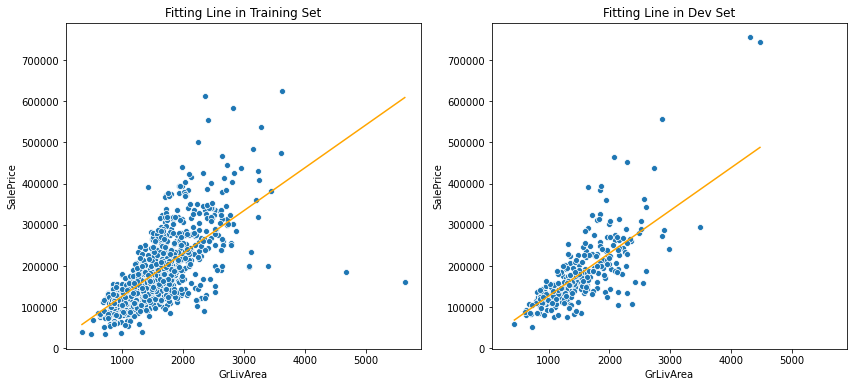

In [17]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot(121)
sns.scatterplot(X_train.values.flatten(), y_train.values.flatten(), ax=ax1)
sns.lineplot(X_train.values.flatten(), y_pred_train.flatten(), ax=ax1, color="orange")
plt.title("Fitting Line in Training Set")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")

ax2 = plt.subplot(122, sharey=ax1, sharex=ax1)
sns.scatterplot(X_dev.values.flatten(), y_dev.values.flatten(), ax=ax2)
sns.lineplot(X_dev.values.flatten(), y_pred_dev.flatten(), ax=ax2, color="orange")
plt.title("Fitting Line in Dev Set")

plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.show()

In [18]:
print("Model parameters:\n", lr.coef_)
print("Model bias:\n", lr.intercept_)

Model parameters:
 [[103.82439832]]
Model bias:
 [23277.44407168]


`coef_` dan `intercept_` adalah parameter yang sebenarnya dilatih saat proses training model regresi linear. Jumlah parameter ($\theta$) model bergantung pada jumlah fitur yang kita gunakan. Karena kita univaraite linear regression berarti hanya menggunakan satu variabel/fitur saja, maka kita hanya melatih satu parameter saja (dan bias).

## Multivariate Linear Regression

Jika univariate/simple linear regression hanya menggunakann satu variabel/fitur, maka multivariabel linear regression atau **multivariate linear regression** menggunakan beberapa variabel untuk memprediksi suatu nilai target.

Meski menggunakan lebih dari satu variabel, seperti univariate linear regression, relasi antara keseluruhan variabel terhadap target tetap **linear**. Jika univariate linear regression memiliki bentuk fungsi umum $y = \theta_0 + \theta_1 x$, maka multivariate linear regression juga memiliki fungsi umum yang sama (berderajat 1) seperti berikut:

$$
y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n
$$

Dengan masih menggunakan data yang sama, kita akan memilih beberapa variabel yang akan digunakan sebagai fitur input model multivariate linear regression kita.

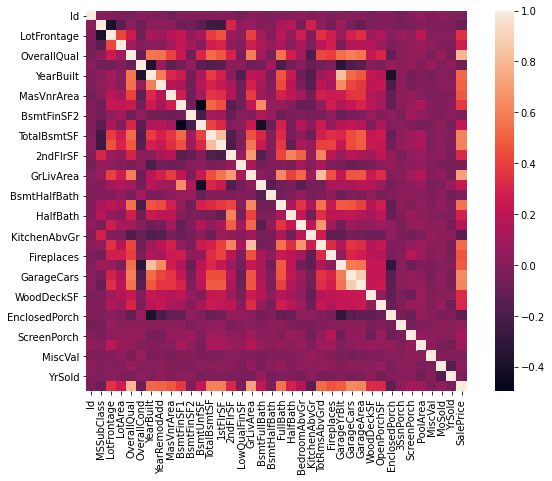

In [19]:
df_corr = df_houses_train.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, square=True)
plt.show()

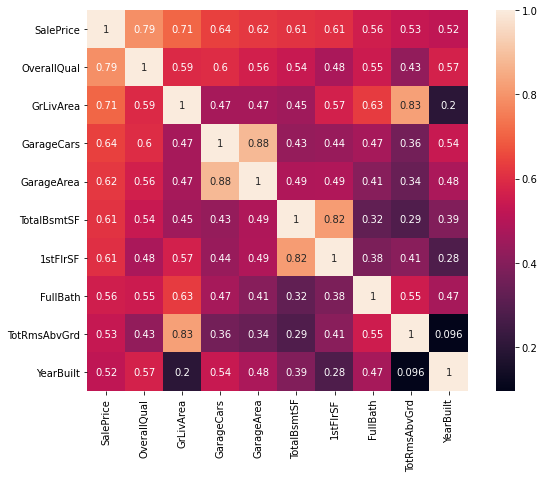

In [20]:
n_largest = 10
cols = df_corr.nlargest(n_largest, "SalePrice")["SalePrice"].index

plt.figure(figsize=(10, 7))
sns.heatmap(
    df_houses_train[cols].corr(),
    annot=True,
    square=True
)
plt.show()

### Your Turn!

Dari plot heatmap di atas, kira-kira fitur apa saja yang sebaiknya kita gunakan (dan yang tidak) sebagai fitur input model dan kenapa?

In [21]:
chosen_cols = [
    "OverallQual", "GrLivArea", "GarageCars",
    "TotalBsmtSF", "FullBath",
    "YearBuilt", "SalePrice"
]
df_train = df_houses_train[chosen_cols]
df_train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,1710,2,856,2,2003,208500
1,6,1262,2,1262,2,1976,181500
2,7,1786,2,920,2,2001,223500
3,7,1717,3,756,1,1915,140000
4,8,2198,3,1145,2,2000,250000


In [22]:
X = df_train.drop(columns=["SalePrice"])
y = df_train[["SalePrice"]]

In [23]:
# TODO: split X and y into X_train, X_dev, y_train, and y_dev
# ... HERE ...
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=.8, random_state=11)

print("Training set size:", X_train.shape[0])
print("Dev set size:", X_dev.shape[0])

Training set size: 1168
Dev set size: 292


In [24]:
# TODO: define and train model `mlr`
# ... HERE ...
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# TODO: predict for train and dev set
#       assign them as `y_pred_train` and `y_pred_dev`
# ... HERE ...
y_pred_train = mlr.predict(X_train)
y_pred_dev = mlr.predict(X_dev)

# TODO: define mae_score, mse_score, rmse_score, and rsquared_score
#       both for train and dev set
# ... HERE ...
mae_score = mean_absolute_error(y_train, y_pred_train)
mse_score = mean_squared_error(y_train, y_pred_train)
rsquared_score = r2_score(y_train, y_pred_train)
rmse_score = np.sqrt(mse_score)

print("MAE score:", mae_score)
print("MSE score:", mse_score)
print("RMSE score:", rmse_score)
print("R-squared score:", rsquared_score)

# ... HERE ...
mae_score_dev = mean_absolute_error(y_dev, y_pred_dev)
mse_score_dev = mean_squared_error(y_dev, y_pred_dev)
rsquared_score_dev = r2_score(y_dev, y_pred_dev)
rmse_score_dev = np.sqrt(mse_score_dev)

print("\nMAE score for dev set:", mae_score_dev)
print("MSE score for dev set:", mse_score_dev)
print("RMSE score for dev set:", rmse_score_dev)
print("R-squared score for dev set:", rsquared_score_dev)

MAE score: 24681.224528727118
MSE score: 1427523331.953835
RMSE score: 37782.579741910624
R-squared score: 0.7630693435700874

MAE score for dev set: 23964.78603427738
MSE score for dev set: 1621335044.7896092
RMSE score for dev set: 40265.804906764366
R-squared score for dev set: 0.7817921656690121


Dari metrics terakhir, seharusnya ada peningkatan performa yang cukup signifikan dari model yang menggunakan beberapa variabel sebagai fitur input.

## Takeaways

* Regresi adalah salah satu task dalam supervised machine learninng yang mencoba memprediksi suatu nilai dalam domain bilangan real
* Berdasarkan jumlah variabel yang digunakan, linear regression dikategorikan sebagai univariate/simple linear regression jika hanya menggunakan satu variabel, dan multivariate linear regressioin jika menggunakan lebih dari satu variabel
* Beberapa metrics yang sering digunakan dalam masalah regresi adalah:
    * Mean Absolute Error (MAE)
    * Mean Squared Error (MSE)
    * Root Mean Squared Error (RMSE)
    * R squared ($R^2$)
* Dalam class `LinearRegression` dari scikit-learn, kita bisa mendapatkan parameter model regresi linear dari atribut `coef_` dan `intercept_` yang secara berturut-turut merepresentasikan nilai bobot/weights dan bias model.